<a href="https://colab.research.google.com/github/DrKenReid/CNN-Tutorial---X-ray-image-classifier/blob/main/CNN_Tutorial_X_ray_image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks (CNNs) for X-ray Pneumonia Detection

## Understanding CNNs

Convolutional Neural Networks (CNNs) are a class of deep learning models that have revolutionized the field of computer vision. Inspired by the human visual cortex, CNNs are designed to automatically and adaptively learn spatial hierarchies of features from input images.

### Why CNNs Excel in Image Processing

CNNs are particularly well-suited for image analysis tasks for several reasons:

1. **Local Connectivity**: CNNs use local receptive fields, allowing them to capture spatial relationships in images.
2. **Parameter Sharing**: Convolutional layers use the same set of weights across the entire image, significantly reducing the number of parameters.
3. **Spatial Hierarchy**: Through multiple layers, CNNs can learn to recognize complex patterns by combining simpler features.
4. **Translation Invariance**: CNNs can detect features regardless of their position in the image.

### Applications in Medical Imaging

In medical imaging, CNNs have shown remarkable success in various tasks, including:

- Disease detection and classification
- Organ and tumor segmentation
- Medical image reconstruction

For our specific case of pneumonia detection from chest X-rays, CNNs can learn to identify subtle patterns and anomalies that may be indicative of the disease.

## Guide Overview

In this tutorial, we'll walk through the process of building, training, and evaluating a CNN for pneumonia detection using chest X-ray images. Here's an overview of the steps we'll cover:

1. **Data Preparation**:
   - Downloading and extracting the pneumonia X-ray dataset
   - Organizing the data into training, validation, and test sets

2. **Data Preprocessing**:
   - Resizing images to a standard size
   - Normalizing pixel values
   - Applying data augmentation techniques

3. **Model Architecture**:
   - Designing a CNN structure suitable for X-ray image analysis
   - Implementing the model using TensorFlow and Keras

4. **Model Training**:
   - Setting up the training process with appropriate hyperparameters
   - Implementing callbacks for early stopping and learning rate adjustment
   - Training the model on the prepared dataset

5. **Model Evaluation**:
   - Assessing the model's performance on the test set
   - Generating and interpreting the confusion matrix
   - Analyzing precision, recall, and F1-score

6. **Visualization and Interpretation**:
   - Visualizing sample predictions alongside actual labels
   - Interpreting the model's performance in a medical context

7. **Model Saving and Loading**:
   - Saving the trained model and its history
   - Loading the model for future use or deployment

By following this guide, medical professionals will gain hands-on experience in applying deep learning techniques to a real-world medical imaging problem.

Thanks to [towardsdatascience for the original tutorial](https://towardsdatascience.com/medical-x-ray-%EF%B8%8F-image-classification-using-convolutional-neural-network-9a6d33b1c2a). Much of the documentation and updates to modern methods and removal of deprecated functions by Ken Reid.

# Connect to your google drive

Google colab (the IDE we're using - the thing you're looking at!) only stores data temporarily while you're using it. You can download results and such manually to your computer, or just store it to your Google Drive.

In [ ]:
from google.colab import drive
import os

# Mount Google Drive if not already mounted
if not os.path.exists('/content/drive'):
    print("Mounting Google Drive...")
    drive.mount('/content/drive')
else:
    print("Google Drive is already mounted.")

Mounting Google Drive...
Mounted at /content/drive


#Kaggle API

Here we automate the process of installing the Kaggle library, securely managing the user's Kaggle credentials, and verifying the API setup. Kaggle allows easy access to download large X-ray datasets, for training and testing our CNN model for pneumonia detection.

To use Kaggle, you must first create an account, then click "Create New Token" from the [Account Settings](https://www.kaggle.com/settings/account) page. When running the below code, you upload the `kaggle.json` file when prompted.

In [ ]:
import os
from google.colab import files

def setup_kaggle_api():
    print("Setting up Kaggle API for X-ray dataset access...")

    # Install Kaggle library
    # The '!' allows us to run shell commands in Colab
    !pip install -q kaggle

    # Check if kaggle.json already exists
    if not os.path.exists('/root/.kaggle/kaggle.json'):
        print("\nPlease upload your kaggle.json file.")
        print("You can find this file in your Kaggle account settings.")
        uploaded = files.upload()

        if 'kaggle.json' not in uploaded:
            raise ValueError("kaggle.json was not uploaded. Please try again.")

        # Create .kaggle folder and move the file
        # These are shell commands to manage files in the Colab environment
        !mkdir -p ~/.kaggle
        !mv kaggle.json ~/.kaggle/

        # Set correct permissions
        # This ensures your Kaggle key is secure
        !chmod 600 ~/.kaggle/kaggle.json

    # Verify the setup
    try:
        # This command lists datasets to check if the API is working
        !kaggle datasets list -q x-ray
        print("\nKaggle API setup successful!")
        print("You can now access X-ray datasets from Kaggle.")
    except Exception as e:
        print(f"\nError verifying Kaggle API setup: {str(e)}")
        print("Please check your kaggle.json file and try again.")

# Run the setup
setup_kaggle_api()

Setting up Kaggle API for X-ray dataset access...

Please upload your kaggle.json file.
You can find this file in your Kaggle account settings.


Saving kaggle.json to kaggle.json
usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,models,m,files,f,config} ...
kaggle: error: unrecognized arguments: -q x-ray

Kaggle API setup successful!
You can now access X-ray datasets from Kaggle.


Here we acquire and prepare the pneumonia X-ray dataset for analysis. It first checks if the dataset is already available in the specified directory (i.e., if you're running this code multiple times, you don't need to download the data repeatedly).

If not, it proceeds to download the dataset from Kaggle, and then extracts the contents of the zip file.

In [ ]:
import os
import zipfile

# Define file paths
zip_file = "/content/pneumonia-xray-images.zip"
target_dir = "/content/dataset/cnn/pneumonia_revamped"

# Check if the dataset is already extracted
if os.path.exists(target_dir) and os.listdir(target_dir):
    print(f"Dataset already exists in {target_dir}")
else:
    # Check if the zip file is already downloaded
    if not os.path.exists(zip_file):
        print("Downloading the dataset...")
        !kaggle datasets download -d pcbreviglieri/pneumonia-xray-images
    else:
        print("Zip file already downloaded.")

    # Extract the contents
    print(f"Extracting dataset to {target_dir}")
    with zipfile.ZipFile(zip_file, 'r') as zfile:
        zfile.extractall(target_dir)

    print(f"Dataset extracted to {target_dir}")

print("\nDataset is ready for use.")

Dataset URL: https://www.kaggle.com/datasets/pcbreviglieri/pneumonia-xray-images
License(s): Attribution 4.0 International (CC BY 4.0)
 99% 1.13G/1.14G [00:17<00:00, 39.5MB/s]
100% 1.14G/1.14G [00:17<00:00, 70.8MB/s]
Extracting dataset to /content/dataset/cnn/pneumonia_revamped
Dataset extracted to /content/dataset/cnn/pneumonia_revamped

Dataset is ready for use.


# 1 Set up

These library imports provide essential tools for data scientists working on image analysis projects:

1. Matplotlib enables the creation of various visualizations, e.g. for displaying X-ray images and plotting analysis results.

2. NumPy facilitates efficient numerical operations and array manipulations, which are fundamental for image processing and data analysis tasks.

3. Pandas offers powerful data manipulation capabilities, useful for handling metadata associated with the images and organizing analysis results in a structured format.

In [ ]:
# Matplotlib: For creating visualizations (e.g., displaying X-ray images, plotting results)
import matplotlib.pyplot as plt

# NumPy: For numerical operations and working with arrays (e.g., image processing)
import numpy as np

# Pandas: For data manipulation and analysis (e.g., handling metadata, organizing results)
import pandas as pd

## 1.1 Define Constants

Then we store the directories of where things are stored.

In [ ]:
# Path to the training dataset
train_path = '/content/dataset/cnn/pneumonia_revamped/train'

# Path to the testing dataset
test_path = '/content/dataset/cnn/pneumonia_revamped/test'

# Path to the validation dataset
valid_path = '/content/dataset/cnn/pneumonia_revamped/val'

Researchers might modify the below parameters for several reasons:

`batch_size`: Adjusting this can impact training speed and memory usage. Larger batches can lead to faster training but require more memory, while smaller batches might improve generalization.

`img_height` & `img_width`: Changing the height and width affects the input size to the CNN. Larger dimensions retain more image detail but increase computational requirements, while smaller dimensions reduce memory usage and computation time but might lose fine details. Note: changing these would likely require changing the structure of the CNN, too, to compensate for additional / less data.

In [ ]:
#Define standard parameter values
batch_size = 32  # Number of images processed in each training iteration
img_height = 500  # Height of input images in pixels
img_width = 500   # Width of input images in pixels

# 2 Preparing Data

## 2.1 Image Data Augmentation

Here we:
*   Define an augmentation function to enhance dataset diversity
*   Load training, testing, and validation datasets from directories
*   Apply data augmentation to the **training set only**
*   Normalize pixel values for all datasets (0-255 to 0-1 range)
*   Set image size, batch size, and color mode (grayscale) for consistency
*   Use binary labels for classification
*   Implement prefetching to optimize data loading performance
*   Print the number of samples in each dataset for verification

In [ ]:
import tensorflow as tf

# Function to apply data augmentation
def augment(image, label):
    # Randomly flip the image horizontally
    image = tf.image.random_flip_left_right(image)

    # Randomly adjust brightness
    image = tf.image.random_brightness(image, max_delta=0.2)

    # Randomly adjust contrast
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)

    # Ensure pixel values are still in [0, 1] range
    image = tf.clip_by_value(image, 0, 1)

    return image, label

# Load and prepare the training dataset
train = tf.keras.utils.image_dataset_from_directory(
    train_path,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='grayscale',
    label_mode='binary'
)
train = train.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y))  # Normalize pixel values
train = train.map(augment)  # Apply data augmentation

# Load and prepare the testing dataset
test = tf.keras.utils.image_dataset_from_directory(
    test_path,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='grayscale',
    label_mode='binary',
    shuffle=False
)
test = test.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y))  # Normalize pixel values

# Load and prepare the validation dataset
valid = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='grayscale',
    label_mode='binary'
)
valid = valid.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y))  # Normalize pixel values

# Use buffered prefetching to load images from disk without I/O blocking
AUTOTUNE = tf.data.AUTOTUNE
train = train.prefetch(buffer_size=AUTOTUNE)
test = test.prefetch(buffer_size=AUTOTUNE)
valid = valid.prefetch(buffer_size=AUTOTUNE)

print("Number of training samples:", tf.data.experimental.cardinality(train))
print("Number of test samples:", tf.data.experimental.cardinality(test))
print("Number of validation samples:", tf.data.experimental.cardinality(valid))

Found 4192 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 1040 files belonging to 2 classes.
Number of training samples: tf.Tensor(131, shape=(), dtype=int64)
Number of test samples: tf.Tensor(20, shape=(), dtype=int64)
Number of validation samples: tf.Tensor(33, shape=(), dtype=int64)


This code visualizes a sample of images from the training dataset:

*    Creates a large figure to display multiple images
Sets up a dictionary to map numeric labels to class names ('NORMAL' or 'PNEUMONIA')
Loops to create 10 subplots in a 2x5 grid

For each subplot:

*    Retrieve one batch of training data
*    Select the first image from the batch
*    Convert the label to a scalar value
*    Set the subplot title to the corresponding class name
*    Display the grayscale image
*    Adjusts layout and displays the entire figure

This visualization helps to verify the dataset, showing a sample of images with their corresponding labels.

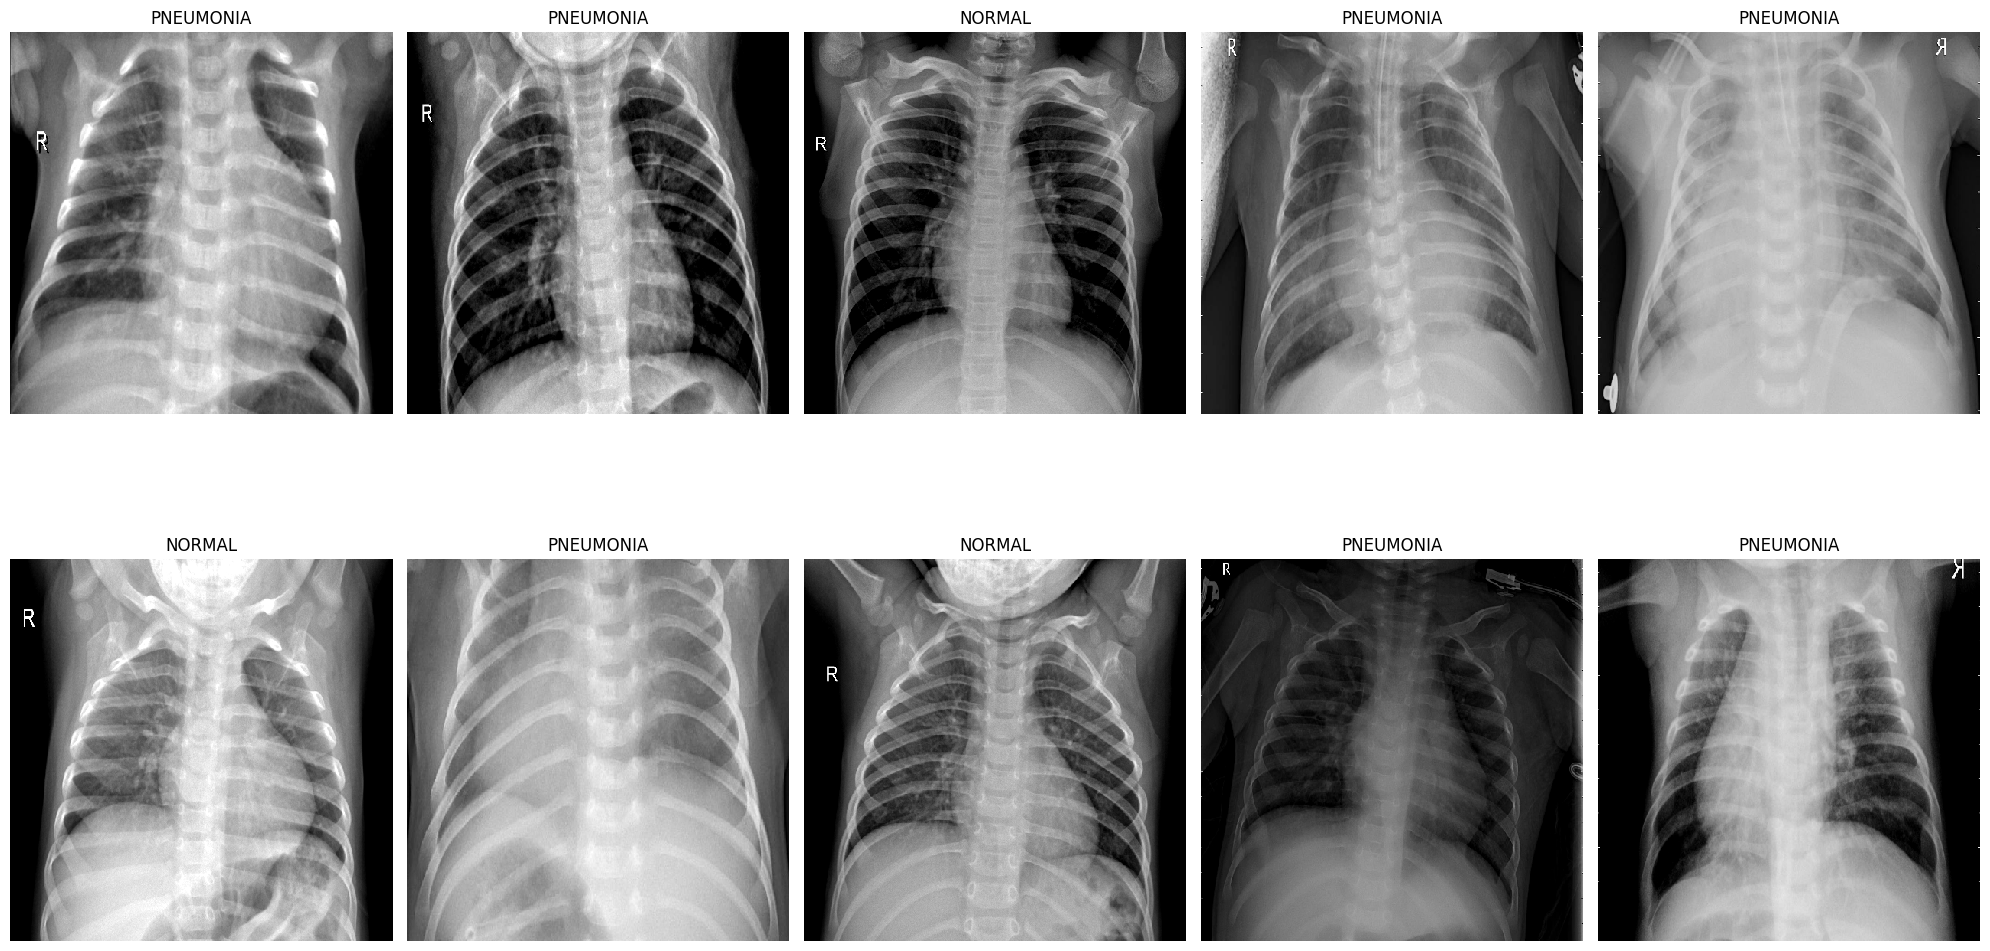

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Create a large figure (20 inches wide, 12 inches tall)
plt.figure(figsize=(20, 12))

# Dictionary to map class indices to labels
dic = {0:'NORMAL', 1:'PNEUMONIA'}

# Loop to create 10 subplots
for i in range(0, 10):
    # Create a subplot in a 2x5 grid
    plt.subplot(2, 5, i+1)

    # Get one batch of training data
    for X_batch, Y_batch in train:
        # Select the first image in the batch
        image = X_batch[0]

        # Convert the label tensor to a scalar value
        label = int(Y_batch[0].numpy().item())

        # Set the title of the subplot to the class of the image
        plt.title(dic[label])

        # Turn off axis labels
        plt.axis('off')

        # Display the image
        # np.squeeze removes single-dimensional entries from the shape of the image array
        plt.imshow(np.squeeze(image), cmap='gray', interpolation='nearest')

        # Break after first image to move to next subplot
        break

# Adjust the layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

## Augment

**Increased Dataset Variability**: These augmentations artificially increase the variety in the training data, helping the model generalize better to new, unseen X-rays.

**Robustness**: The model becomes more robust to variations it might encounter in real-world scenarios, like slightly rotated images or differences in X-ray brightness.

**Overfitting Prevention**: By introducing random variations, we help prevent the model from memorizing the exact training images.

**Domain-Specific Choices**: Notice how some transformations (like vertical flip) are turned off. This is because they don't make sense for chest X-rays. Always consider the nature of your data when choosing augmentations.

**Balanced Approach**: The parameters are set to introduce variability without distorting the images so much that they become unrealistic or lose important features.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img
image_gen = ImageDataGenerator(
    # Pixel-level transformations
    featurewise_center=False,  # Don't adjust the mean of the image data to 0 over the dataset
    samplewise_center=False,  # Don't adjust each sample's mean to 0
    featurewise_std_normalization=False,  # Don't divide inputs by std of the dataset
    samplewise_std_normalization=False,  # Don't divide each input by its std
    zca_whitening=False,  # Don't apply ZCA whitening (a form of data normalization)

    # Geometric transformations
    rotation_range=15,  # Randomly rotate images by up to 15 degrees
    zoom_range=0.2,  # Randomly zoom image in or out by up to 20%
    width_shift_range=0.1,  # Randomly shift images horizontally by up to 10% of total width
    height_shift_range=0.1,  # Randomly shift images vertically by up to 10% of total height
    horizontal_flip=True,  # Randomly flip images horizontally
    vertical_flip=False,  # Don't flip images vertically (uncommon for X-ray images)
    shear_range=0.2,  # Randomly apply shearing transformations

    # Color transformations
    brightness_range=(1.2, 1.5)  # Randomly adjust brightness by 20% to 50% increase
)

# 3 Tensorflow - Keras

These imports provide essential tools for building and managing CNN models:

*    `Sequential`, `load_model`, `save_model`: For creating, saving, and loading models.
*    `Dense`, `Conv2D`, `Flatten`, `MaxPooling2D`: Core layers for building CNN architectures.
*    `EarlyStopping`, `ReduceLROnPlateau`: Callbacks to prevent overfitting and optimize training.

In [ ]:
from tensorflow.keras.models import Sequential,load_model,save_model
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

## 3.1 Convolutional Neural Network Model

CNN Structure Explanation:

1. Input Layer: Accepts grayscale X-ray images (img_width x img_height x 1)

2. Convolutional Layers:
   - 5 Conv2D layers (3 with 32 filters, 2 with 64 filters)
   - Each followed by MaxPooling
   - Gradually increase filters (32 to 64) to detect more complex features

3. Flatten Layer: Converts 2D feature maps to 1D vector

4. Dense Layers:
   - Two hidden layers (128 and 64 units) for feature interpretation
   - Final layer (1 unit) for binary classification (pneumonia or not)

Design Decisions:

1. Number of layers: Balances between model complexity and overfitting risk
2. Filter numbers: Start small (32) and increase (64) to capture more details
3. Multiple Conv+MaxPool: Allows hierarchical feature learning
4. Dense layer sizes: Gradually decrease to funnel down to final classification
5. Activation functions: ReLU for hidden layers, Sigmoid for output

Adjusting the structure:
- Add more layers for more complex feature detection
- Increase/decrease filters based on dataset size and complexity
- Modify dense layer sizes based on classification performance
- Consider dropout layers to prevent overfitting if necessary


In [ ]:
# Initialize a sequential model (layers in sequence)
cnn = Sequential()

# Convolutional layers (detect features in images)
# ReLU: Rectified Linear Unit, an activation function that outputs the input directly if it's positive, or zero otherwise
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
# MaxPooling: Reduces image size, retaining important features
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(32, (3, 3), activation="relu"))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(32, (3, 3), activation="relu"))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(64, (3, 3), activation="relu"))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(64, (3, 3), activation="relu"))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten: Converts 2D feature maps to 1D feature vector
cnn.add(Flatten())

# Dense layers: Fully connected layers for classification
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'relu', units = 64))
# Sigmoid: Activation function that outputs a value between 0 and 1, suitable for binary classification
cnn.add(Dense(activation = 'sigmoid', units = 1))

# Compile the model
cnn.compile(
    # Adam: An optimization algorithm that adapts the learning rate
    optimizer = 'adam',
    # Binary Crossentropy: Loss function suitable for binary classification problems
    loss = 'binary_crossentropy',
    # Accuracy: Proportion of correct predictions among the total number of cases
    metrics = ['accuracy']
)

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 498, 498, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 249, 249, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 247, 247, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 123, 123, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 121, 121, 32)      9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 60, 60, 32)        0

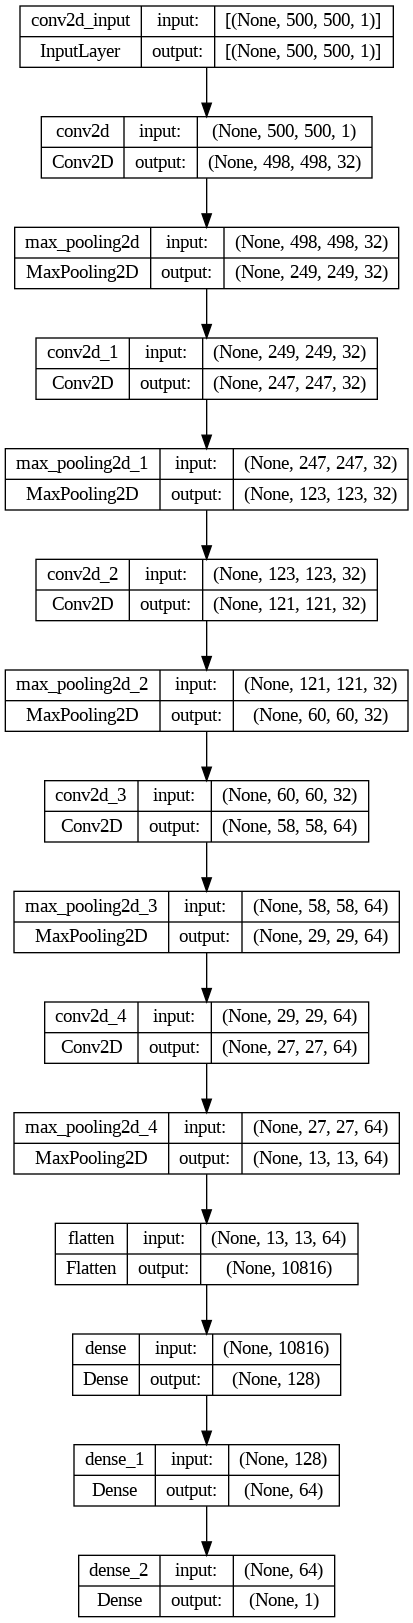

In [ ]:
# Import the plot_model utility from Keras
from tensorflow.keras.utils import plot_model

# Generate a plot of the CNN model
plot_model(
    cnn,                     # The model to visualize
    show_shapes=True,        # Show the shape of the inputs/outputs of each layer
    show_layer_names=True,   # Display the name of each layer
    rankdir='TB',            # 'TB' means top to bottom layout
    expand_nested=True       # Expand nested models/layers
)

## 3.2 Fit Model

This code sets up two important mechanisms to improve the training process of the CNN:

**Early Stopping (EarlyStopping)**:

Purpose:

*    Prevents overfitting by stopping the training process when the model stops improving.

How it works:

*    Monitors the validation loss ('`val_loss`')
*    Aims to minimize this loss ('`mode="min"`')
If there's no improvement for 3 consecutive epochs ('`patience=3`'), it stops training

Benefit:

*    Helps avoid overfitting, where the model might perform well on training data but poorly on new, unseen data.

**Learning Rate Reduction (ReduceLROnPlateau)**:

Purpose:

*    Adjusts the learning rate during training to fine-tune the model's performance.

How it works:

*    Monitors the validation loss if there's no improvement for 2 epochs ('`patience=2`'), it reduces the learning rate
*    The learning rate is reduced by multiplying it by 0.3 ('`factor=0.3`')
*    The learning rate will not go below 0.000001 ('`min_lr=0.000001`')

Benefit:

*    Helps the model converge to a better solution by making smaller adjustments as it gets closer to the optimum.

**Why these callbacks are important:**

1. Efficiency: Early stopping saves computational resources by preventing unnecessary training epochs.
2. Generalization: Both callbacks help in creating a model that generalizes well to new X-ray images, not just the training set.
3. Fine-tuning: Learning rate reduction allows the model to make finer adjustments as it gets closer to the optimal solution.
4. Automation: These callbacks automate part of the hyperparameter tuning process, reducing the need for manual intervention.
5. Preventing Overfitting: Especially crucial in medical applications where the model needs to perform well on diverse, real-world X-rays.

**For this specific pneumonia detection model:**

Early stopping will help ensure that the model doesn't start memorizing ONLY the training X-rays.
Learning rate reduction will help in fine-tuning the model's ability to detect subtle features in X-rays that indicate pneumonia.

In [ ]:
# Define Early Stopping callback
early = EarlyStopping(
    monitor="val_loss",  # Monitor validation loss
    mode="min",          # We want to minimize the loss
    patience=3           # Number of epochs with no improvement after which training will stop
)

# Define Learning Rate Reduction callback
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_loss',  # Monitor validation loss
    patience=2,          # Number of epochs with no improvement after which learning rate will be reduced
    verbose=1,           # Print a message when the learning rate changes
    factor=0.3,          # Factor by which the learning rate will be reduced
    min_lr=0.000001      # Minimum learning rate
)

# Combine callbacks into a list
callbacks_list = [early, learning_rate_reduction]

**Label Extraction:**

The extract_labels function iterates through the train dataset.
It extracts the labels (y) from each batch of data.
These labels represent the classifications of the X-ray images (likely 0 for NORMAL and 1 for PNEUMONIA).


**Label Processing:**

The extracted labels are converted to integers to ensure compatibility with subsequent operations.
np.unique(train_labels) identifies the unique classes in the dataset (likely [0, 1]).


**Class Weight Computation:**

compute_class_weight calculates weights for each class based on their frequency in the dataset.
The 'balanced' strategy assigns higher weights to less frequent classes.
This helps address class imbalance, which is common in medical datasets where diseased cases might be less common than normal cases.


**Class Distribution:**

The code counts the number of samples for each class.
This provides insight into the balance (or imbalance) of the dataset.


**Output:**

The class weights are printed, showing the relative importance assigned to each class.
The class distribution is displayed, revealing the actual count of samples in each class.

In [ ]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf

# Function to extract labels from the dataset
def extract_labels(dataset):
    labels = []
    for _, y in dataset:
        labels.extend(y.numpy().flatten())  # Flatten in case of multi-dimensional labels
    return np.array(labels)

# Extract labels from the training dataset
train_labels = extract_labels(train)

# Ensure labels are integers
train_labels = train_labels.astype(int)

# Get unique classes
classes = np.unique(train_labels)

# Compute class weights
weights = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=train_labels
)

# Create a dictionary mapping class indices to weights
cw = dict(zip(classes, weights))
print("Class weights:", cw)

# Print class distribution
unique, counts = np.unique(train_labels, return_counts=True)
print("\nClass distribution:")
for class_label, count in zip(unique, counts):
    print(f"Class {class_label}: {count} samples")

Class weights: {0: 1.9371534195933457, 1: 0.6739549839228296}

Class distribution:
Class 0: 1082 samples
Class 1: 3110 samples



## Training

**Iterative Process:** Training a neural network is an iterative process. The model sees the entire dataset multiple times (epochs) to learn patterns.


**Validation:** Using a separate validation dataset helps ensure the model is generalizing well and not just memorizing the training data.


**Class Imbalance:** By using class weights, we're addressing the potential imbalance between normal and pneumonia X-rays, ensuring the model doesn't bias towards the majority class.


**Optimization:** The callbacks help in automatically adjusting the training process, potentially stopping early if the model stops improving or reducing the learning rate to fine-tune the model.


**Monitoring:** While not shown here, you'd typically monitor metrics like accuracy and loss for both training and validation sets to assess how well the model is learning.

**Important considerations:**

**Number of Epochs:** One epoch is usually not enough for complex tasks like pneumonia detection. You'd typically train for more epochs until the model's performance stabilizes.

**Computational Resources:** Training CNNs, especially on large datasets of medical images, can be computationally intensive and time-consuming.

**Model Evaluation:** After training, you'd evaluate the model on a separate test set to get an unbiased estimate of its performance.

**Iterative Improvement:** Based on the results, you might need to adjust the model architecture, hyperparameters, or preprocessing steps and retrain.

**Clinical Validation:** Remember that for medical applications, statistical performance is just the first step. Clinical validation and regulatory approval would be necessary before any real-world application.

In [ ]:
# Train the CNN model
history = cnn.fit(
    train,                  # Training data
    epochs=3,               # Number of times to iterate over the entire dataset
    validation_data=valid,  # Validation dataset for monitoring performance
    class_weight=cw,        # Class weights to handle imbalanced dataset
    callbacks=callbacks_list # List of callbacks for training optimization
)

Epoch 1/3
131/131 [==============================] - 1447s 11s/step - loss: 0.4710 - accuracy: 0.7555 - val_loss: 0.2699 - val_accuracy: 0.9154 - lr: 0.0010
Epoch 2/3
131/131 [==============================] - 1436s 11s/step - loss: 0.1904 - accuracy: 0.9246 - val_loss: 0.1340 - val_accuracy: 0.9404 - lr: 0.0010
Epoch 3/3
131/131 [==============================] - 1436s 11s/step - loss: 0.1517 - accuracy: 0.9413 - val_loss: 0.1473 - val_accuracy: 0.9394 - lr: 0.0010


## Saving the model

**Storage Space:** Deep learning models, especially those trained on image data, can be quite large. Ensure you have sufficient storage space.

**Security:** When dealing with models trained on medical data, ensure that your saved model doesn't inadvertently contain any sensitive patient information.

**Documentation:** It's good practice to document the performance metrics, dataset details, and training parameters along with your saved model.

**Compatibility:** Ensure you note the versions of TensorFlow and Keras used, as there might be compatibility issues when loading models with different software versions.

**Regulatory Compliance:** In a clinical setting, saving and versioning models properly is often required for regulatory compliance and audit trails.

In [ ]:
import json
import numpy as np

# Define file paths
model_fp = "/content/drive/My Drive/cnn_pneu_vamp_model.keras"
history_fp = "/content/drive/My Drive/cnn_pneu_vamp_history.json"

# Custom JSON encoder to handle NumPy types
class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NumpyEncoder, self).default(obj)

# Save the model and history
def save_model_and_history(model, history, model_fp, history_fp):
    # Save the model
    model.save(model_fp)

    # Save the history
    with open(history_fp, 'w') as f:
        json.dump(history.history, f, cls=NumpyEncoder)

    print("Model and history saved successfully.")

# Load the model and history
def load_model_and_history(model_fp, history_fp):
    # Load the model
    model = tf.keras.models.load_model(model_fp)

    # Load the history
    with open(history_fp, 'r') as f:
        history = json.load(f)

    print("Model and history loaded successfully.")
    return model, history

# Save the model and history
save_model_and_history(cnn, history, model_fp, history_fp)

# Load the model and history
loaded_model, loaded_history = load_model_and_history(model_fp, history_fp)

# Print available metrics
print("Available metrics:", list(loaded_history.keys()))

Model and history saved successfully.
Model and history loaded successfully.
Available metrics: ['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr']


In [ ]:
# Load the model and history
def load_model_and_history(model_fp, history_fp):
    # Load the model
    model = tf.keras.models.load_model(model_fp)

    # Load the history
    with open(history_fp, 'r') as f:
        history = json.load(f)

    print("Model and history loaded successfully.")
    return model, history

# Load the model and history
loaded_model, loaded_history = load_model_and_history(model_fp, history_fp)

Model and history loaded successfully.


##3.3 Evaluation

**Test Set Importance:** The test set represents new, unseen data. Performance on this set is a better indicator of how well your model will generalize to new X-ray images in a clinical setting.

**Accuracy Interpretation:** The accuracy tells you what percentage of X-rays the model correctly classified (as pneumonia or normal). For example, an accuracy of 85% means the model correctly classified 85 out of 100 X-rays.

**Clinical Relevance:** While accuracy is important, in a medical context, you'll also want to consider other metrics like sensitivity (ability to correctly identify pneumonia cases) and specificity (ability to correctly identify normal cases).

**Benchmark Comparison:** This accuracy should be compared to both human-level performance and existing automated systems for pneumonia detection.


In a medical context, understanding the implications of false positives (unnecessarily worrying patients) and false negatives (missing cases of pneumonia) are critical, for obvious reasons.

In [ ]:
# Evaluate the model on the test dataset
test_accu = cnn.evaluate(test)

# Print the testing accuracy
print('The testing accuracy is:', test_accu[1]*100, '%')

20/20 [==============================] - 59s 3s/step - loss: 0.8746 - accuracy: 0.7804
The testing accuracy is: 78.04487347602844 %


Here we perform the evaluation of the trained CNN model on the test dataset. Here's a breakdown of its key components:

1. Label Extraction:
   - The `get_labels` function extracts the true labels from the test dataset.

2. Predictions:
   - `cnn.predict(test)` generates predictions for all samples in the test dataset.

3. Binary Classification:
   - Predictions (probabilities) are converted to binary class labels using a 0.5 threshold.

4. Performance Evaluation:
   - The `classification_report` provides a detailed breakdown of the model's performance, including precision, recall, and F1-score for each class.
   - The `confusion_matrix` shows the count of true positives, false positives, true negatives, and false negatives.

This evaluation process is crucial for assessing the model's performance in classifying X-ray images as normal or pneumonia. It provides insights into the model's accuracy, its ability to correctly identify positive cases (sensitivity), and its ability to correctly identify negative cases (specificity), which are all critical metrics in medical diagnostics.

Explanation of our metrics

(reminder): Classes (0.0 and 1.0):

0.0 represents "NORMAL"
1.0 represents "PNEUMONIA"


Precision:

*    For class 0.0: 0.92 - Of all predicted normal cases, 92% were actually normal
*    For class 1.0: 0.75 - Of all predicted pneumonia cases, 75% were actually pneumonia


Recall:

*    For class 0.0: 0.45 - Of all actual normal cases, the model correctly identified 45%
*    For class 1.0: 0.98 - Of all actual pneumonia cases, the model correctly identified 98%


F1-score:

*    Harmonic mean of precision and recall
*    For class 0.0: 0.61
*    For class 1.0: 0.85


Support:

*    Number of samples for each class in the test set
     *    234 samples for class 0.0 (NORMAL)
     *    390 samples for class 1.0 (PNEUMONIA)


Accuracy:

*    0.78 - Overall, the model correctly classified 78% of all samples

Macro avg:

*    Simple average of the metrics for both classes


Weighted avg:

*    Average of the metrics, weighted by the number of samples in each class

My run of this suggested the model is better at identifying pneumonia cases (high recall for class 1.0) but may over-predict pneumonia (lower precision for class 1.0 compared to class 0.0).

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Function to extract labels from the dataset
def get_labels(dataset):
    labels = []
    for _, y in dataset:
        labels.extend(y.numpy())
    return np.concatenate(labels)

# Get true labels
true_labels = get_labels(test)

# Make predictions on the test dataset
predictions = cnn.predict(test)

# Convert predictions to binary class labels
class_predictions = (predictions > 0.5).astype("int32")

# Generate and print the classification report
print("Classification Report:")
print(classification_report(true_labels, class_predictions))

# Generate and print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(true_labels, class_predictions))

20/20 [==============================] - 53s 3s/step
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.45      0.61       234
         1.0       0.75      0.98      0.85       390

    accuracy                           0.78       624
   macro avg       0.84      0.71      0.73       624
weighted avg       0.81      0.78      0.76       624


Confusion Matrix:
[[106 128]
 [  9 381]]


Below we visualize the training progress of a CNN model:

1. It creates two subplots: one for accuracy and one for loss.
2. Both training and validation metrics are plotted over epochs.
3. Final metrics are printed for quick reference.

Results interpretation:

1. Accuracy: Both training and validation accuracy improve rapidly and stabilize around 94%, indicating good learning and generalization.

2. Loss: Training and validation loss decrease quickly, with validation loss slightly lower, suggesting the model isn't overfitting.

3. Convergence: The model appears to converge after just 2-3 epochs, showing efficient learning on this dataset.

4. Performance: High final accuracies (>94%) suggest strong performance in distinguishing between normal and pneumonia X-rays.

5. Stability: The close alignment of training and validation curves indicates good model stability and generalization.

Overall, these results suggest a well-performing model that learns quickly and generalizes well to unseen data, which is promising for pneumonia detection applications.

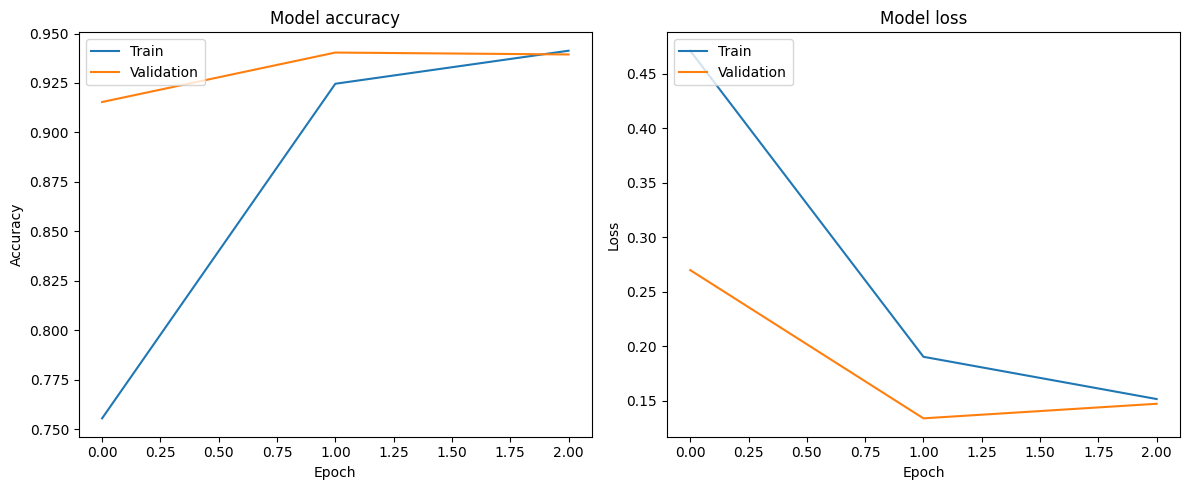

Final training accuracy: 0.9413167834281921
Final validation accuracy: 0.9394230842590332
Final training loss: 0.15168574452400208
Final validation loss: 0.14734821021556854

Available metrics: ['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr']


In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is the History object returned by model.fit()

if history.history:
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(122)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

    # Print final epoch metrics
    print("Final training accuracy:", history.history['accuracy'][-1])
    print("Final validation accuracy:", history.history['val_accuracy'][-1])
    print("Final training loss:", history.history['loss'][-1])
    print("Final validation loss:", history.history['val_loss'][-1])
else:
    print("The history object is empty. Make sure the model has been trained.")

# Optionally, print the keys in the history dictionary to see what's available
print("\nAvailable metrics:", list(history.history.keys()))

Below we perform final evaluation steps on the model's predictions:

1. Converts probability predictions to binary classifications (0 or 1) using a 0.5 threshold.

2. Prints the shape of the predictions array and the first few predictions for a quick check.

3. Extracts true labels from the test dataset.

4. Calculates and prints the overall accuracy of the model on the test set using sklearn's accuracy_score function.

This process provides a straightforward assessment of the model's performance, showing how well it classifies X-ray images into normal and pneumonia categories on unseen data. The accuracy score gives a single, interpretable metric of the model's overall effectiveness in this binary classification task.

In [ ]:
# Convert predictions to binary (0 or 1)
preds = (predictions > 0.5).astype(int)

# Print the shape of predictions
print("Shape of predictions:", preds.shape)

# Print the first few predictions
print("First few predictions:", preds[:10])

# Calculate and print accuracy
from sklearn.metrics import accuracy_score

# Assuming 'test' is your test dataset and you can access the true labels
true_labels = np.concatenate([y for x, y in test], axis=0)
accuracy = accuracy_score(true_labels, preds)
print(f"Test Accuracy: {accuracy:.4f}")

Shape of predictions: (624, 1)
First few predictions: [[0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]]
Test Accuracy: 0.7804


Lets build a confusion matrix graphically:

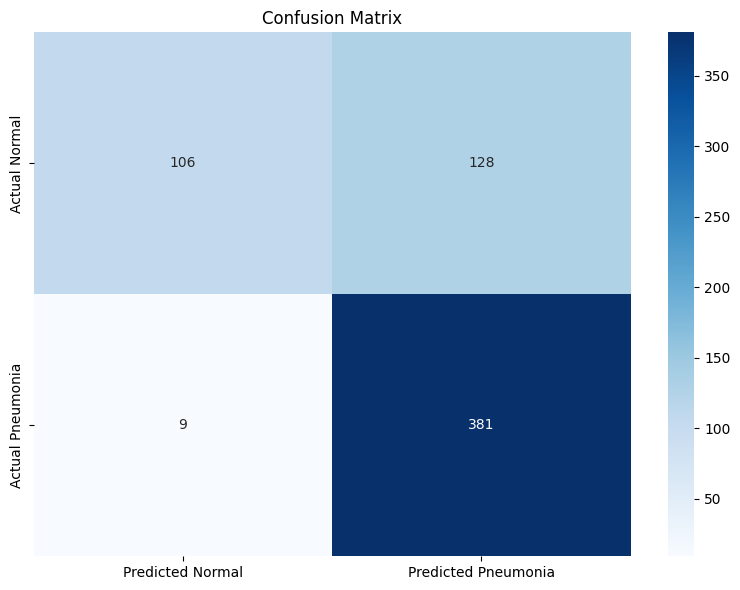


Classification Report:
              precision    recall  f1-score   support

      Normal       0.92      0.45      0.61       234
   Pneumonia       0.75      0.98      0.85       390

    accuracy                           0.78       624
   macro avg       0.84      0.71      0.73       624
weighted avg       0.81      0.78      0.76       624



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Function to extract labels from the dataset
def get_labels(dataset):
    labels = []
    for _, y in dataset:
        labels.extend(y.numpy())
    return np.array(labels)

# Get true labels
true_labels = get_labels(test)

# Generate predictions if not already done
if 'preds' not in locals():
    preds = cnn.predict(test)
    preds = (predictions > 0.5).astype(int)

# Create confusion matrix
cm = confusion_matrix(true_labels, preds)

# Create DataFrame for better visualization
cm_df = pd.DataFrame(data=cm,
                     index=["Actual Normal", "Actual Pneumonia"],
                     columns=["Predicted Normal", "Predicted Pneumonia"])

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(true_labels, preds, target_names=["Normal", "Pneumonia"]))

Below we:

1. Reset the test dataset iterator to ensure we process all data once.

2. Define a function `extract_data` that:
   - Iterates through the TensorFlow dataset
   - Converts TensorFlow tensors to numpy arrays
   - Collects all images (x) and labels (y) separately

3. Extract all images and labels from the test dataset into numpy arrays `x` and `y`.

4. Print information about the extracted data:
   - Shapes of X (images) and Y (labels) arrays
   - Data types of X and Y
   - Unique values in Y (showing different classes)
   - Distribution of samples across classes

We convert the TensorFlow dataset into a format that's easier to work with for certain analyses and visualizations, while also providing a summary of the dataset's characteristics.

In [ ]:
# Reset the test dataset iterator
test = test.repeat(1)  # This ensures we only go through the dataset once

# Function to extract data from a TensorFlow dataset
def extract_data(dataset):
    x_list, y_list = [], []
    for x, y in dataset:
        x_list.append(x.numpy())
        y_list.append(y.numpy())
    return np.concatenate(x_list), np.concatenate(y_list)

# Extract data
x, y = extract_data(test)

print("X shape:", x.shape)
print("Y shape:", y.shape)

# Print some additional information
print("\nX data type:", x.dtype)
print("Y data type:", y.dtype)
print("Unique values in Y:", np.unique(y))
print("Class distribution:")
for class_id, count in zip(*np.unique(y, return_counts=True)):
    print(f"Class {class_id}: {count} samples")

X shape: (624, 500, 500, 1)
Y shape: (624, 1)

X data type: float32
Y data type: float32
Unique values in Y: [0. 1.]
Class distribution:
Class 0.0: 234 samples
Class 1.0: 390 samples


Never just trust the numbers. Let's visualize and *see* some results.

<ipython-input-39-b87210d77258>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  actual_label = dic.get(int(y[i]), 'Unknown')


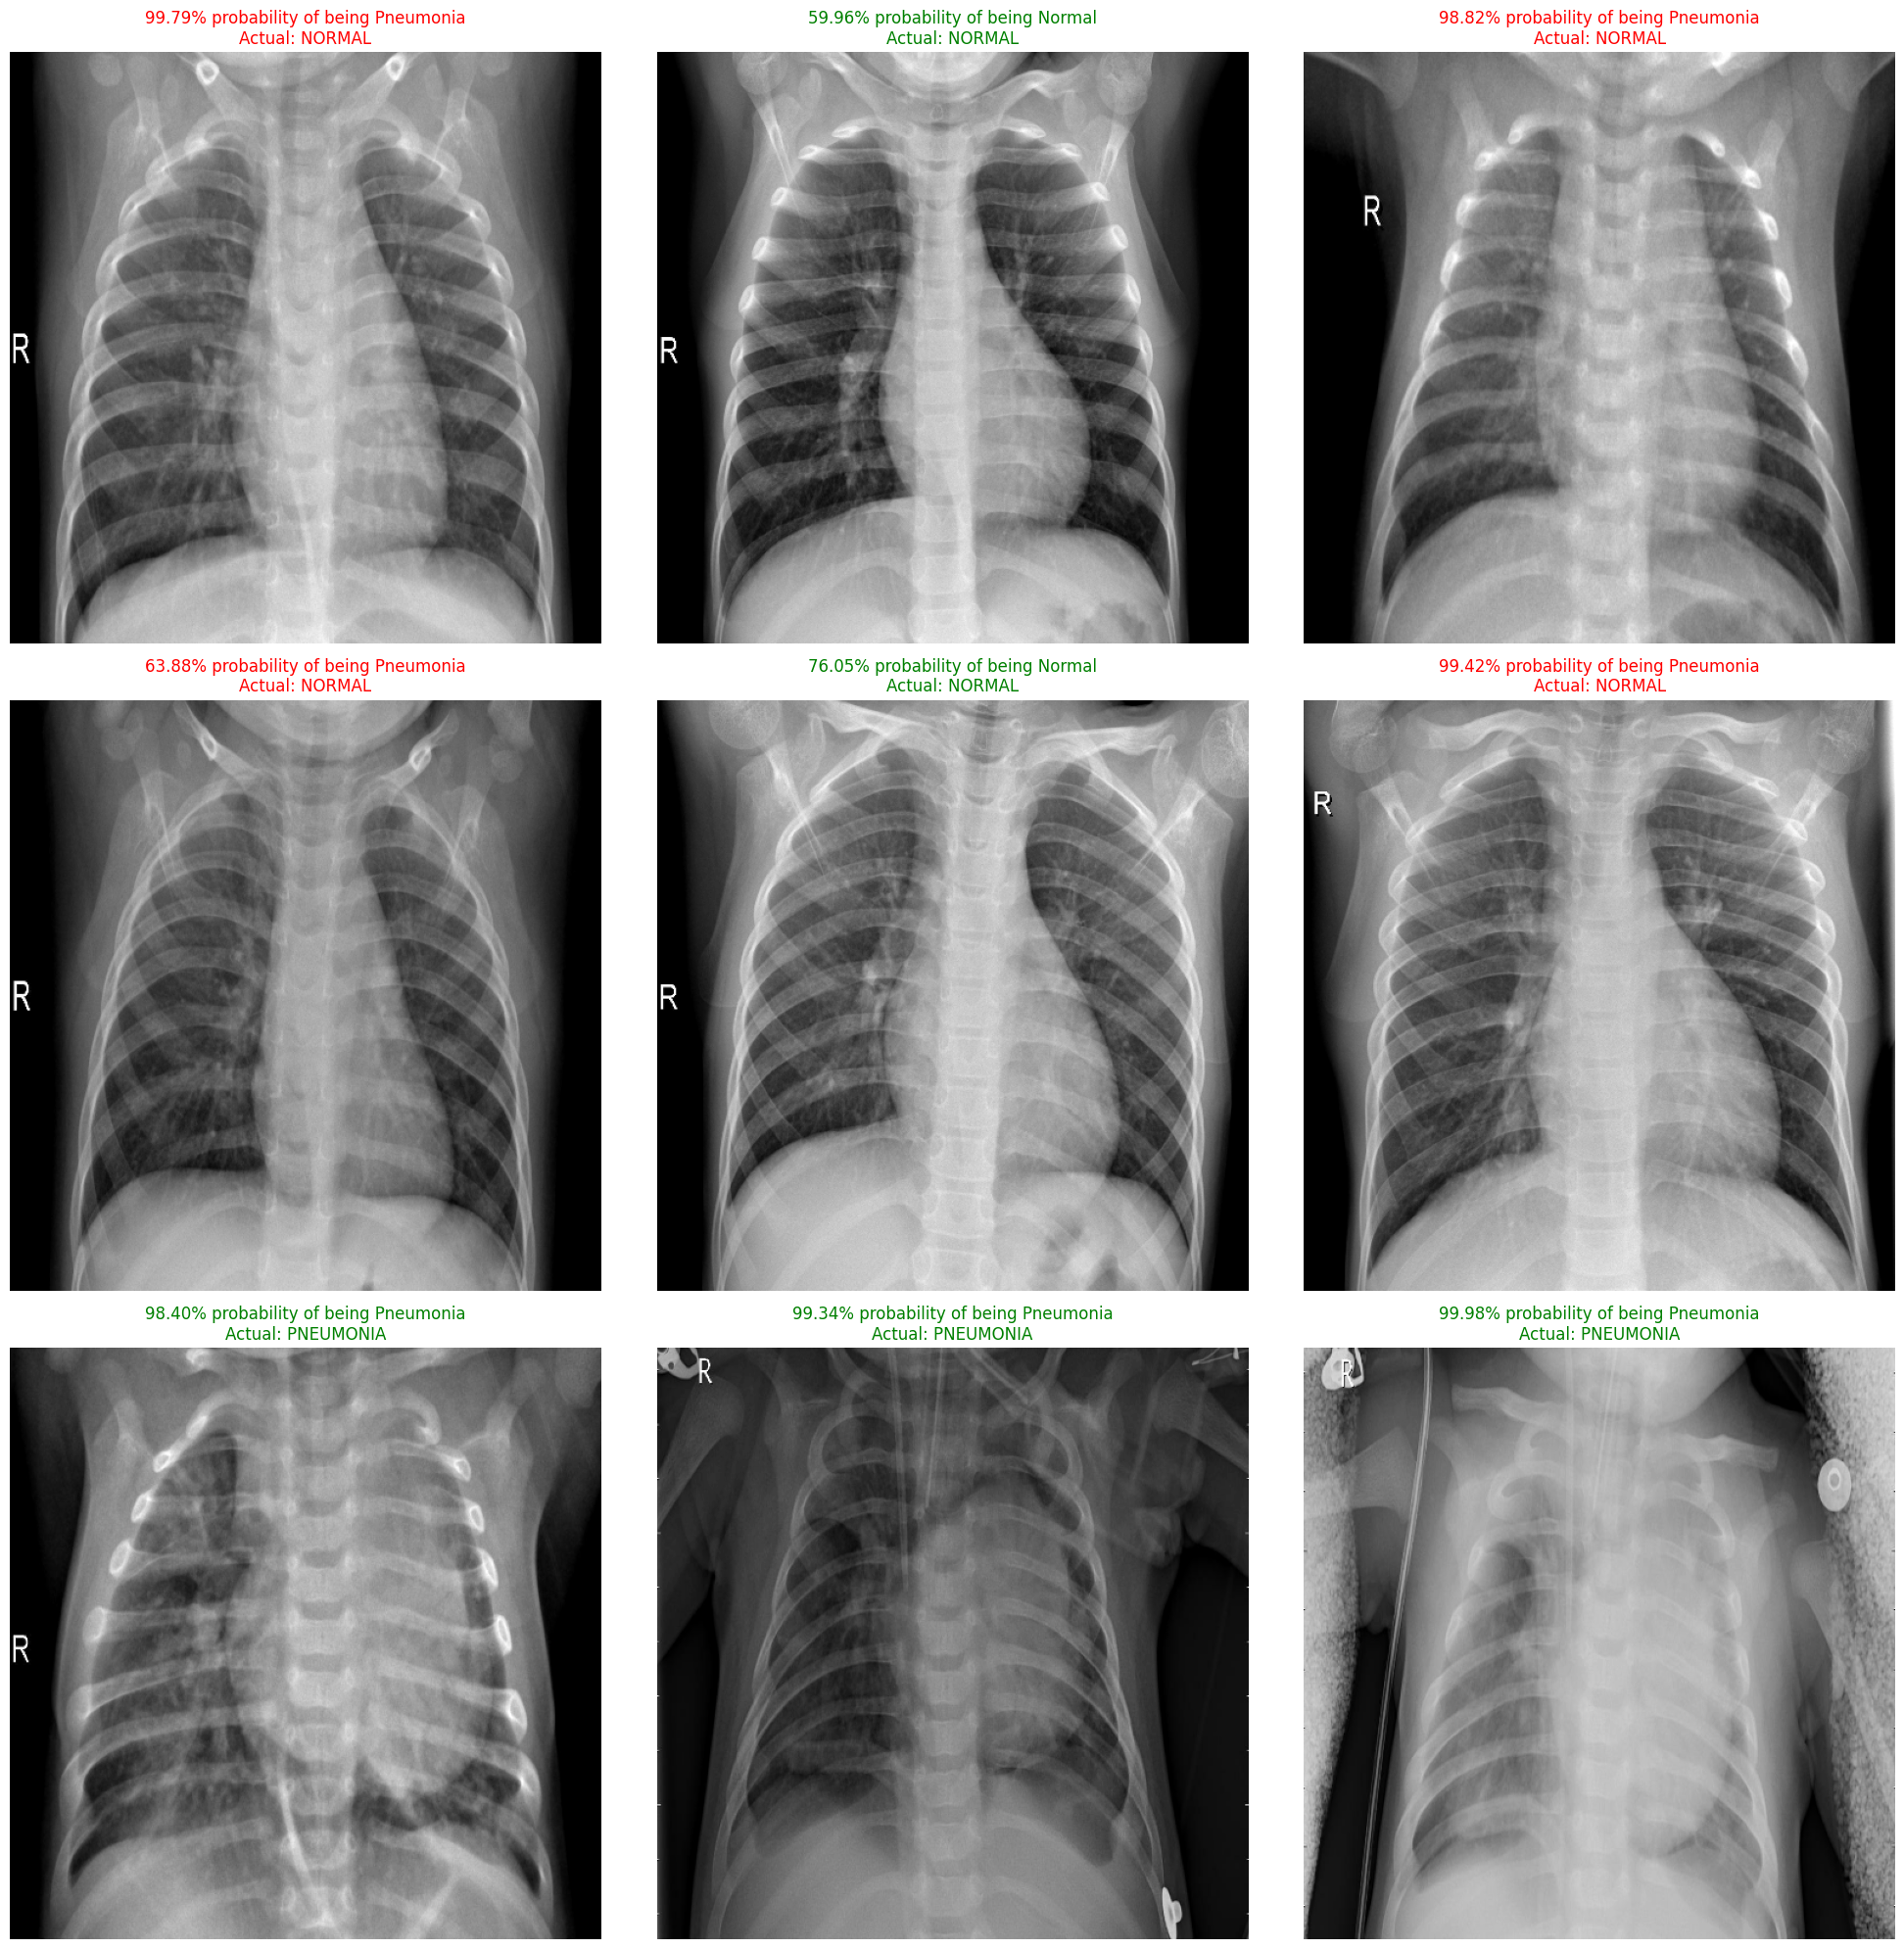

Overall accuracy: 78.04%


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

dic = {0: 'NORMAL', 1: 'PNEUMONIA'}
plt.figure(figsize=(20, 20))

for i in range(228, 237):  # 9 images, starting from index 228
    plt.subplot(3, 3, i - 227)

    prob_pneumonia = predictions[i][0]

    if prob_pneumonia >= 0.5:
        out = f'{prob_pneumonia:.2%} probability of being Pneumonia'
    else:
        out = f'{1-prob_pneumonia:.2%} probability of being Normal'

    # Convert numpy array to integer before using as dictionary key
    actual_label = dic.get(int(y[i]), 'Unknown')

    # Add color to title based on prediction correctness
    is_correct = (prob_pneumonia >= 0.5) == (y[i] == 1)
    color = 'green' if is_correct else 'red'

    plt.title(f"{out}\nActual: {actual_label}", color=color)

    plt.imshow(np.squeeze(x[i]), cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Print overall accuracy
accuracy = np.mean((preds >= 0.5) == y)
print(f"Overall accuracy: {accuracy:.2%}")